# Pymaceuticals Inc.
---

### Analysis

- From the bar chart, we can see that Capomulin regimen is used more compared to other drug regimens. 
- From the box plot, we can come to the analysis that Camomulin is the most effective medicine at reducing tumor volume followed by Ramicane based on the data we have. We concuded that becauase Campomulin has the lowest median tumor volume and the smallest interquartile range which suggests that Capomulin is more steady in its effect on tumor volume. 
- From the scatter plot, we see that there is a correlation between the weight of the mice and its affect on tumor size. The less the mice weighs, it helps decrease tumor size. The correlation between the average tumor volume and weight for Capomulin regimen is 0.84 which indicates a linear correlation. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')

# Display the data table for preview
complete_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
num_mice = complete_data['Mouse ID'].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = complete_data.loc[complete_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = complete_data.loc[complete_data["Mouse ID"] == 'g989',:]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data[complete_data["Mouse ID"].isin(duplicate_mice)== False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_data['Mouse ID'].nunique()
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


Mean = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
Median = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
Variance = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
Standard_deviation = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
Standard_error = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
#print(Mean)
#print(Median)
#print(Variance)
#print(Standard_deviation)

df = pd.DataFrame({
    'Mean Tumor Volume': Mean, 
    'Median Tumor Volume': Median, 
    'Tumor Volume Variance': Variance,
    'Tumor Volume Std. Dev.': Standard_deviation,
    'Tumor Volume Std. Err.': Standard_error
}).reset_index()
df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
).reset_index().set_index('Drug Regimen')
summary_df.columns = pd.MultiIndex.from_tuples(zip(['Tumor Volume (mm3)', '', '', '', ''],summary_df))
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

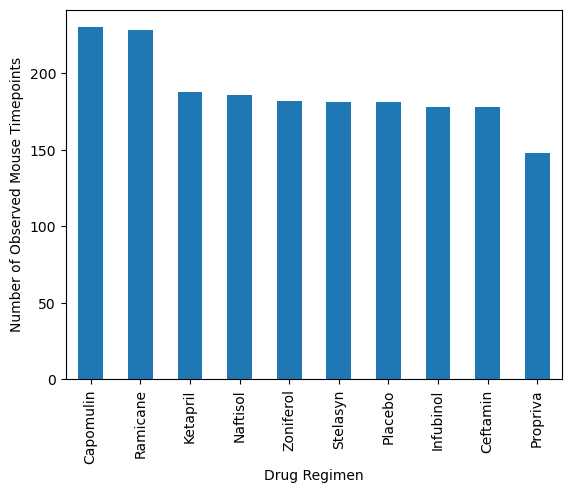

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_data['Drug Regimen'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Number of Observed Mouse Timepoints')
plt.show()

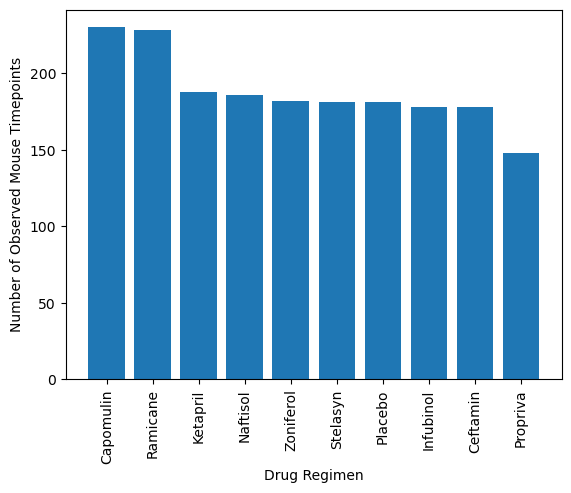

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

counts = clean_data['Drug Regimen'].value_counts()
plt.bar(counts.index.values, counts.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Number of Observed Mouse Timepoints')
plt.show()

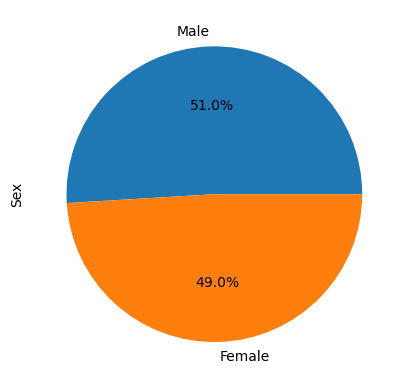

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_data['Sex'].value_counts()
counts.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

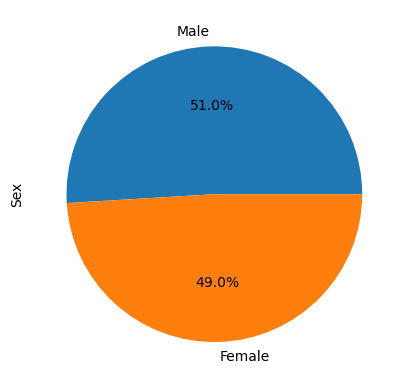

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_data['Sex'].value_counts()
plt.pie(counts.values,labels=counts.index.values, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = complete_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_data = last_timepoint.merge(complete_data, on=['Mouse ID', 'Timepoint'], how='left')
merge_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []
for regimen in treatment_regimen:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume_data =  merge_data.loc[merge_data["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']
    
# Create empty list to fill with tumor vol data (for plotting)
    tumor_volume_data.append(final_tumor_volume_data)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = final_tumor_volume_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # add subset

    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = final_tumor_volume_data.loc[(final_tumor_volume_data < lower_bound) | (final_tumor_volume_data > upper_bound)]
    
    print(f"{regimen}'spotential outliers: {outliers}")

Capomulin'spotential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane'spotential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol'spotential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin'spotential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


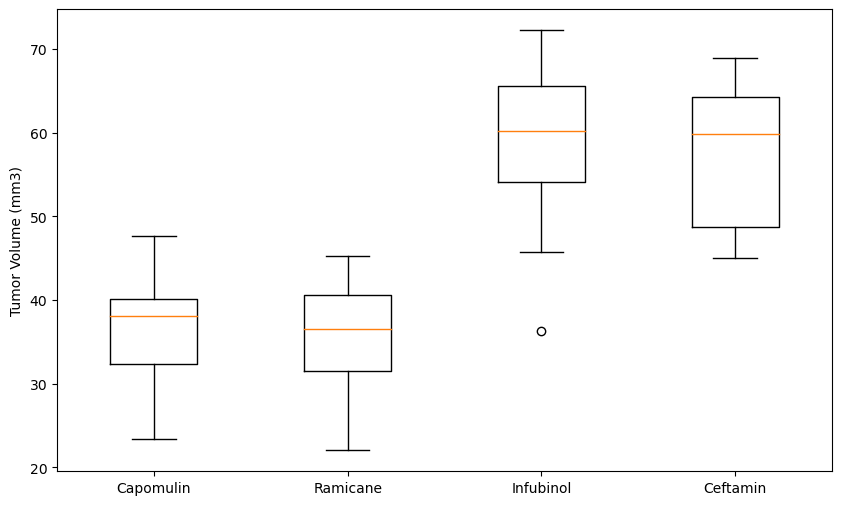

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatment_regimen)
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

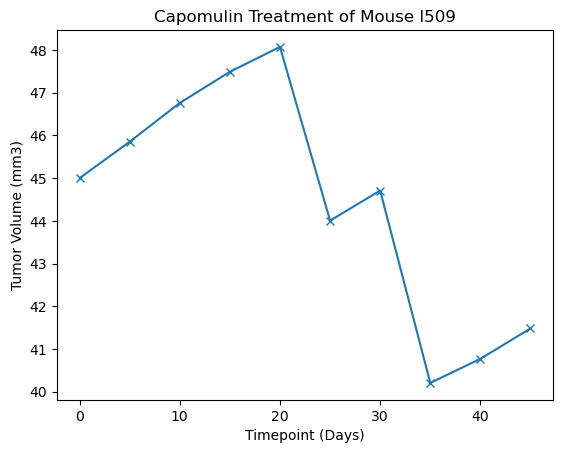

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Mouse "l509 is treated with Capomulin
mouse = complete_data.loc[complete_data['Mouse ID'] == 'l509']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='x')
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

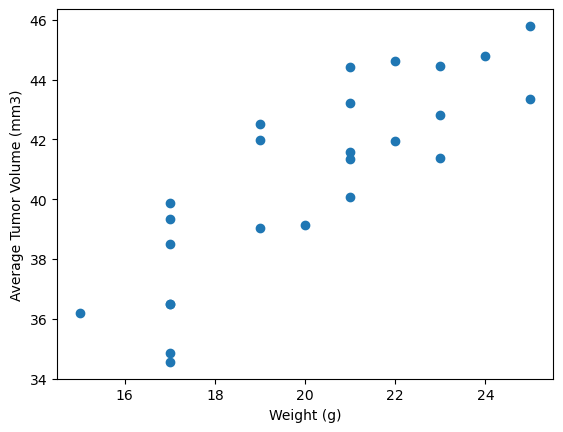

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = complete_data.loc[complete_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volime for each mouse
average_volume = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())
average_volume = average_volume.reset_index()
average_volume = average_volume.rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})


# Merge average tumor volume onto complete_data and drop duplicates
avg_vol_df = pd.merge(capomulin_df, average_volume, on='Mouse ID')
final_avg_vol = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

final_avg_vol

x_axis = final_avg_vol['Weight (g)']
y_axis = final_avg_vol['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x_axis, y_axis)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

y = 0.95x + 21.55
The r-value is: 0.7088568047708727


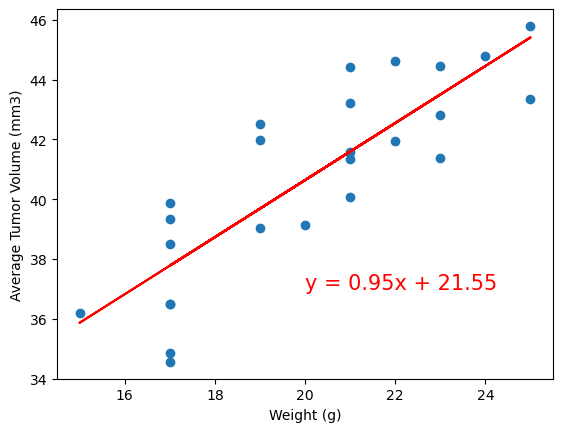

The correlation between the average tumor volume and weight for Capomulin regimen is 0.84


In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(x_axis, y_axis)

#Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
#print(regress_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_equation)

# Create Plot
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_equation,(20,37),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
print(f"The correlation between the average tumor volume and weight for Capomulin regimen is {round(correlation[0],2)}")
